## Data Analysis pipeline for all datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\kurier.xlsx")
df

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible
0,kurier,https://kurier.at/chronik/oberoesterreich/verk...,"ns, oevp, us, ss, schi, sp",2024-10-23 00:00:00,NaN,2024-10-24,"23.10.24, 14:40",NaN,NaN,Mehr Unfaelle mit Menschen auf Raedern in Linz...,"Unfaelle gesamt ruecklaeufig, gleich viele Aut...",Es tut sich was und dabei ist noch viel Luft n...,0.0,0.0,0.0,1.0
1,kurier,https://kurier.at/chronik/wien/christian-kern-...,"rki, ns, us, ss, klima, sp",2024-10-23 00:00:00,NaN,2024-10-24,"23.10.24, 15:56",NaN,NaN,"Fuer 3,65 Millionen Euro: Ex-Kanzler Kern verk...",Christian Kern verkauft seine Luxus-Villa fuer...,Ex-Bundeskanzler Chrisitan Kern trennt sich en...,0.0,0.0,0.0,1.0
2,kurier,https://kurier.at/politik/inland/fpoe-herbert-...,"abschiebung, rna, usa, neos, sp, rki, inflatio...",2024-06-13 00:00:00,NaN,2024-10-24,"13.06.24, 10:12",NaN,NaN,Blaue Szenarien: Wie Kickl die FPOe in die Reg...,Motiviert durch das historische gute EU-Wahler...,Querschuesse? Handwerkliche Fehler? Obmann-Deb...,0.0,0.0,0.0,1.0
3,kurier,https://kurier.at/chronik/niederoesterreich/no...,"ns, lockdown, us, pandemie, ss, corona, sp",2021-02-10 00:00:00,NaN,2024-10-24,"10.02.21, 16:11",NaN,NaN,"NOe: Weniger Unfaelle, aber mehr Rowdys",Zwar krachte es auf Niederoesterreichs Strasse...,Die Pandemie wirkt sich auf alle Lebensbereich...,0.0,0.0,0.0,1.0
4,kurier,https://kurier.at/chronik/niederoesterreich/sa...,"ns, sp, us",2021-10-18 00:00:00,NaN,2024-10-24,"18.10.21, 09:41",NaN,NaN,Golf-Wunder in St. Poelten: 84-Jaehriger schaf...,Bei einem Turnier im Golfclub Goldegg gelang K...,Der KURIER berichtet verstaerkt aus der Landes...,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,kurier,https://kurier.at/chronik/niederoesterreich/sa...,"ns, ss, sp, us",2021-10-12 00:00:00,NaN,2024-10-24,"12.10.21, 12:29",NaN,NaN,Neues Stadtquartier: So wird die St. Poeltner ...,"Die ""Rossmarkthoefe"" auf dem Areal des ehemali...",Der KURIER berichtet verstaerkt aus der Landes...,NaN,NaN,NaN,NaN
1007,kurier,https://kurier.at/politik/ausland/britischer-m...,"politik, ns, us, impfstoff, afrika, ss, regier...",2021-02-07 00:00:00,NaN,2024-10-24,"07.02.21, 13:57",NaN,NaN,Britischer Minister: Corona-Impfung kuenftig e...,Mit einer Impfung ist es nicht getan: In Gross...,NaN,NaN,NaN,NaN,NaN
1008,kurier,https://kurier.at/chronik/oesterreich/etwas-me...,"ns, us, pandemie, ss, corona",2020-11-09 00:00:00,NaN,2024-10-24,"09.11.20, 13:42",NaN,NaN,Fast 5.600 neue Corona-Infektionen in Oesterreich,3.229 Menschen muessen derzeit wegen Covid-19 ...,Von Sonntag auf Montag wurden in Oesterreich 5...,NaN,NaN,NaN,NaN
1009,kurier,https://kurier.at/chronik/oberoesterreich/deba...,"ns, us, pandemie, ss, corona, sp, leiche",2020-11-10 00:00:00,NaN,2024-10-24,"10.11.20, 07:49",NaN,NaN,Debatte um Leitfaden: Volksschueler erst ab 38...,Oberoesterreichische Bildungsdirektion beruft ...,"Die Bildungsdirektion in Oberoesterreich, wo z...",NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [3]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News        0.0
Extreme bias     0.0
clickbait        0.0
credible        33.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   news_outlet          1011 non-null   object        
 1   provenance           1011 non-null   object        
 2   query_keywords       1011 non-null   object        
 3   creation_date        1011 non-null   object        
 4   last_modified        0 non-null      float64       
 5   crawl_date           1010 non-null   datetime64[ns]
 6   author_person        1010 non-null   object        
 7   author_organization  0 non-null      float64       
 8   news_keywords        0 non-null      float64       
 9   content_title        1010 non-null   object        
 10  content_description  1006 non-null   object        
 11  content_body         973 non-null    object        
 12  Fake News            33 non-null     float64       
 13  Extreme bias         33 non-null 

plot of label distr

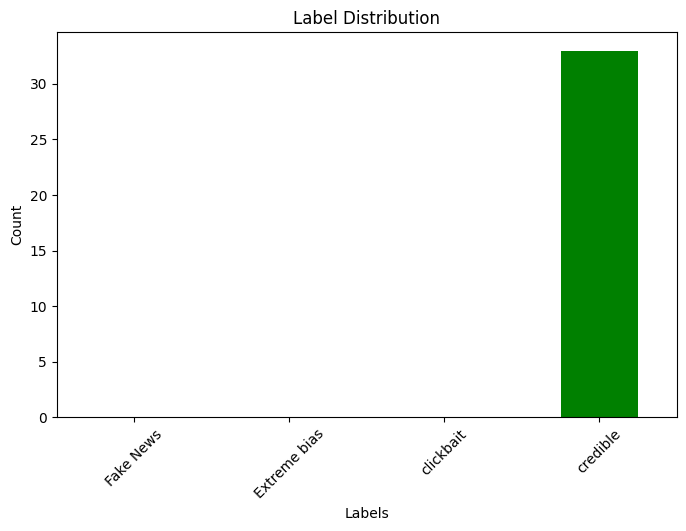

In [5]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

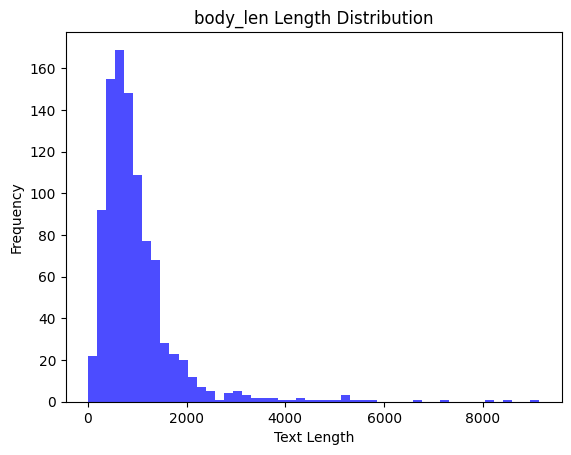

In [6]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

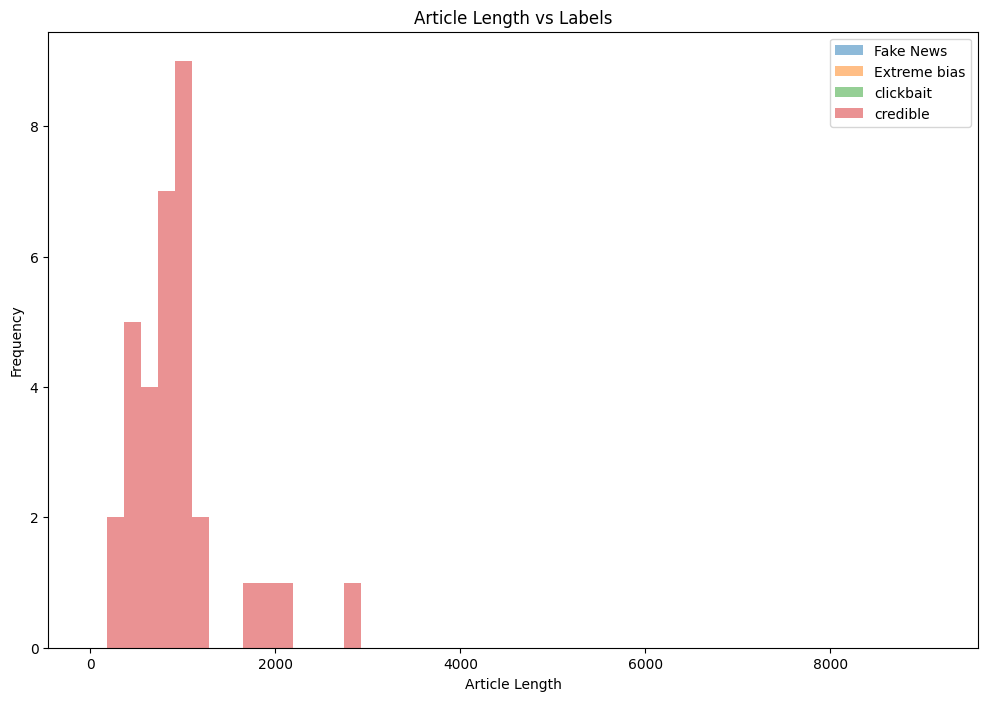

In [7]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize bodies

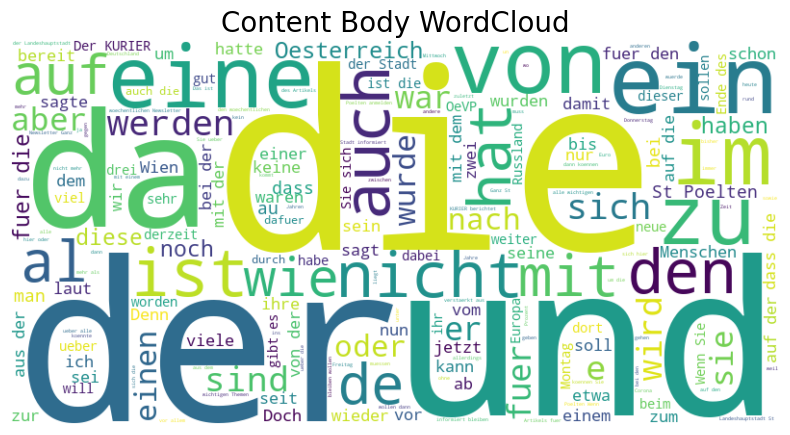

In [8]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Body WordCloud')

visualize title

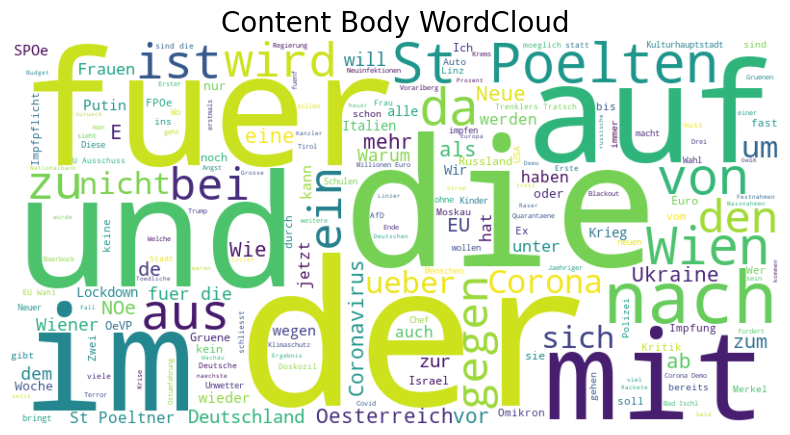

In [ ]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Title WordCloud')

split df to labelled and not labelled

In [10]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 33 rows
Unlabelled Data: 978 rows


In [11]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
0,kurier,https://kurier.at/chronik/oberoesterreich/verk...,"ns, oevp, us, ss, schi, sp",2024-10-23 00:00:00,NaN,2024-10-24,"23.10.24, 14:40",NaN,NaN,Mehr Unfaelle mit Menschen auf Raedern in Linz...,"Unfaelle gesamt ruecklaeufig, gleich viele Aut...",Es tut sich was und dabei ist noch viel Luft n...,0.0,0.0,0.0,1.0,628.0,True
1,kurier,https://kurier.at/chronik/wien/christian-kern-...,"rki, ns, us, ss, klima, sp",2024-10-23 00:00:00,NaN,2024-10-24,"23.10.24, 15:56",NaN,NaN,"Fuer 3,65 Millionen Euro: Ex-Kanzler Kern verk...",Christian Kern verkauft seine Luxus-Villa fuer...,Ex-Bundeskanzler Chrisitan Kern trennt sich en...,0.0,0.0,0.0,1.0,440.0,True
2,kurier,https://kurier.at/politik/inland/fpoe-herbert-...,"abschiebung, rna, usa, neos, sp, rki, inflatio...",2024-06-13 00:00:00,NaN,2024-10-24,"13.06.24, 10:12",NaN,NaN,Blaue Szenarien: Wie Kickl die FPOe in die Reg...,Motiviert durch das historische gute EU-Wahler...,Querschuesse? Handwerkliche Fehler? Obmann-Deb...,0.0,0.0,0.0,1.0,2851.0,True
3,kurier,https://kurier.at/chronik/niederoesterreich/no...,"ns, lockdown, us, pandemie, ss, corona, sp",2021-02-10 00:00:00,NaN,2024-10-24,"10.02.21, 16:11",NaN,NaN,"NOe: Weniger Unfaelle, aber mehr Rowdys",Zwar krachte es auf Niederoesterreichs Strasse...,Die Pandemie wirkt sich auf alle Lebensbereich...,0.0,0.0,0.0,1.0,968.0,True
4,kurier,https://kurier.at/chronik/niederoesterreich/sa...,"ns, sp, us",2021-10-18 00:00:00,NaN,2024-10-24,"18.10.21, 09:41",NaN,NaN,Golf-Wunder in St. Poelten: 84-Jaehriger schaf...,Bei einem Turnier im Golfclub Goldegg gelang K...,Der KURIER berichtet verstaerkt aus der Landes...,0.0,0.0,0.0,1.0,974.0,True


encode labels

In [12]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_43192\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [13]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
0,kurier,https://kurier.at/chronik/oberoesterreich/verk...,"ns, oevp, us, ss, schi, sp",2024-10-23 00:00:00,NaN,2024-10-24,"23.10.24, 14:40",NaN,NaN,Mehr Unfaelle mit Menschen auf Raedern in Linz...,"Unfaelle gesamt ruecklaeufig, gleich viele Aut...",Es tut sich was und dabei ist noch viel Luft n...,0.0,0.0,0.0,1.0,628.0,True,"[0, 0, 0, 1]"
1,kurier,https://kurier.at/chronik/wien/christian-kern-...,"rki, ns, us, ss, klima, sp",2024-10-23 00:00:00,NaN,2024-10-24,"23.10.24, 15:56",NaN,NaN,"Fuer 3,65 Millionen Euro: Ex-Kanzler Kern verk...",Christian Kern verkauft seine Luxus-Villa fuer...,Ex-Bundeskanzler Chrisitan Kern trennt sich en...,0.0,0.0,0.0,1.0,440.0,True,"[0, 0, 0, 1]"
2,kurier,https://kurier.at/politik/inland/fpoe-herbert-...,"abschiebung, rna, usa, neos, sp, rki, inflatio...",2024-06-13 00:00:00,NaN,2024-10-24,"13.06.24, 10:12",NaN,NaN,Blaue Szenarien: Wie Kickl die FPOe in die Reg...,Motiviert durch das historische gute EU-Wahler...,Querschuesse? Handwerkliche Fehler? Obmann-Deb...,0.0,0.0,0.0,1.0,2851.0,True,"[0, 0, 0, 1]"
3,kurier,https://kurier.at/chronik/niederoesterreich/no...,"ns, lockdown, us, pandemie, ss, corona, sp",2021-02-10 00:00:00,NaN,2024-10-24,"10.02.21, 16:11",NaN,NaN,"NOe: Weniger Unfaelle, aber mehr Rowdys",Zwar krachte es auf Niederoesterreichs Strasse...,Die Pandemie wirkt sich auf alle Lebensbereich...,0.0,0.0,0.0,1.0,968.0,True,"[0, 0, 0, 1]"
4,kurier,https://kurier.at/chronik/niederoesterreich/sa...,"ns, sp, us",2021-10-18 00:00:00,NaN,2024-10-24,"18.10.21, 09:41",NaN,NaN,Golf-Wunder in St. Poelten: 84-Jaehriger schaf...,Bei einem Turnier im Golfclub Goldegg gelang K...,Der KURIER berichtet verstaerkt aus der Landes...,0.0,0.0,0.0,1.0,974.0,True,"[0, 0, 0, 1]"


we can drop, whatever we dont need, later

export data

In [14]:
labelled_df.to_csv('kurier_labelled_data.csv', index=False)
unlabelled_df.to_csv('kurier_unlabelled_data.csv', index=False)